# Data Preprocessing

In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the CSV file into Pandas Dataframe

In [2]:
df = pd.read_csv("data.csv",encoding='ISO-8859-1')

/tmp/ipykernel_3988/901186919.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv",encoding='ISO-8859-1')


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## 1. Summarized details of the data.

### Data Type Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

### Statistical Summary

In [5]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## 2. Count the number of data 

In [6]:
df.size

5664646

## 3. How Many rows and Columns are there in the dataset

In [7]:
df.shape

(435742, 13)

There are 435742 rows and 13 columns

## 4. How many null data are in each column

In [8]:
df_null_count = pd.DataFrame(df.isna().sum()).reset_index()
df_null_count = df_null_count.rename(columns = {'index':'Column Name',0:'NullCount'})
df_null_count['percentage'] = (df_null_count['NullCount']/df.shape[0])*100
df_null_count.sort_values(by=['percentage'],ascending=False)

,Column Name,NullCount,percentage
11,pm2_5,426428,97.862497
9,spm,237387,54.478797
4,agency,149481,34.304933
0,stn_code,144077,33.064749
8,rspm,40222,9.230692
6,so2,34646,7.951035
10,location_monitoring_station,27491,6.309009
7,no2,16233,3.725370
5,type,5393,1.237659
12,date,7,0.001606


From the datafame above we can see that column `pm2_5` has maximum percentage of null values

## 5. Drop out the following columns stn_code, agency, sampling_date, location_monitoring_agency

In [9]:
df.drop(columns=['stn_code','agency','sampling_date','location_monitoring_station'], inplace=True)

In [10]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [11]:
df[df['date'].isna()].shape

(7, 9)

In [12]:
df.shape

(435742, 9)

## 6. Drop out the row where the date is not available. 

In [13]:
df.dropna(subset=['date'],inplace=True)

In [14]:
df.shape

(435735, 9)

In [15]:
df['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

## 7. Making Values Uniform

    Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’. 
    So, let’s remove such type of stuff as changing the types to uniform format As: 
    1. "Residential": "R", 
    2. "Residential and others": "RO", 
    3. "Residential, Rural and other Areas": "RRO",  
    4. "Industrial Area": "I",   
    5. "Industrial Areas": "I",    
    6. "Industrial": "I",  
    7. "Sensitive Area": "S", 
    8. "Sensitive Areas": "S", 
    9. "Sensitive": "S", 
    10. np.nan: "RRO"

In [16]:
df['type']=df['type'].replace({
    'Industrial Area':'I',
    'Industrial Areas':'I',
    'Industrial':'I',
    'Sensitive Area':'S',
    'Sensitive Areas':'S',
    'Sensitive':'S',
    'Residential':'R',
    'Residential and others':'RO',
    'Residential, Rural and other Areas':'PRO',
    np.nan:'PRO'
})

In [17]:
df['type'].value_counts()

PRO      184403
I        148069
RO        86791
S         15010
RIRUO      1304
R           158
Name: type, dtype: int64

In [18]:
df.isna().sum()

state            0
location         0
type             0
so2          34643
no2          16230
rspm         40219
spm         237380
pm2_5       426421
date             0
dtype: int64

## 8. Create additional column year 

In [19]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [20]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,PRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,PRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,PRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


## 9. Remove null values from SO2, NO2, rspm, spm, pm2_5

### Plotting Histogram for Each Column

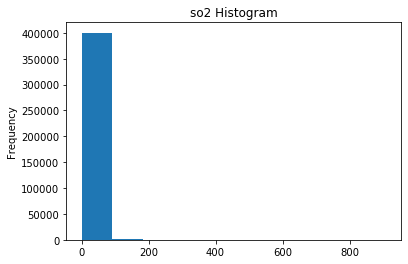

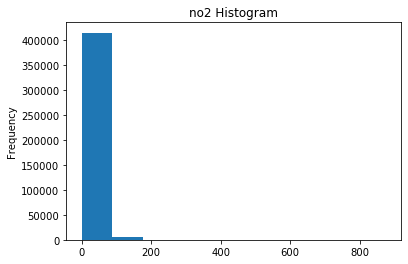

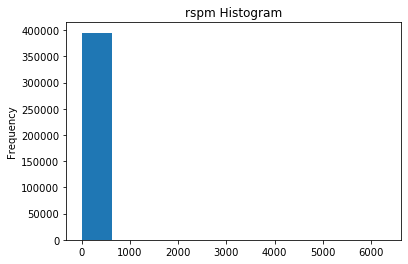

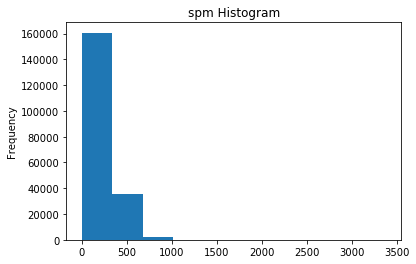

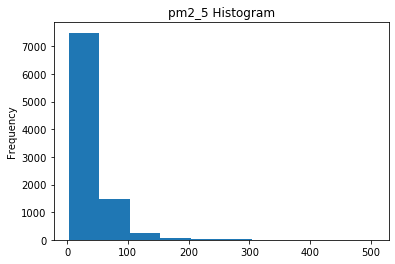

In [21]:
columns = ['so2','no2','rspm','spm','pm2_5']
for column in columns:
    df[column].plot(kind='hist')
    plt.title(f'{column} Histogram')
    plt.show()

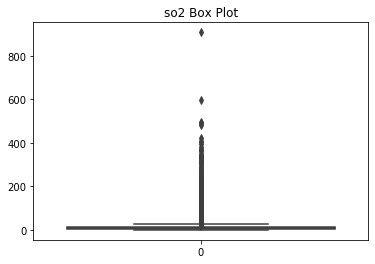

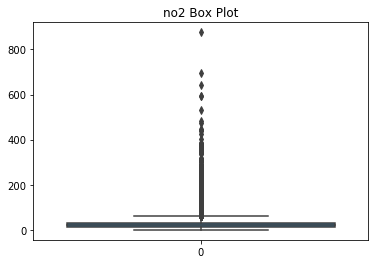

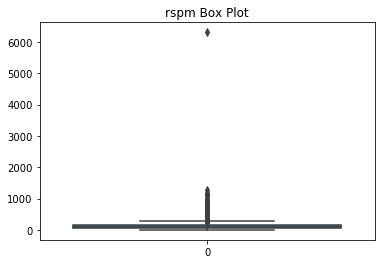

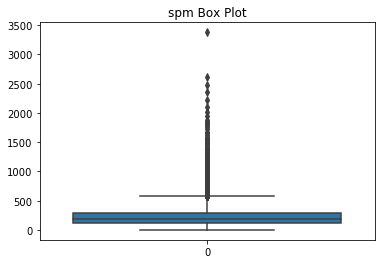

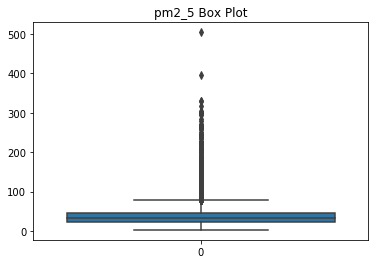

In [22]:
for column in columns:
    sns.boxplot(df[column])
    plt.title(f'{column} Box Plot')
    plt.show()

In [23]:
df['so2'].describe()

count    401092.000000
mean         10.829428
std          11.177239
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

Looks like none of the column follow normal distribution we will repalce the `Null or Missing Values` with **median**

In [24]:
for column in columns:
    df[column].fillna(df[column].median(),inplace=True)
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## 10. Plot barchart state wise of so2, no2, rspm, spm, pm2_5

In [ ]:
plt.bar(df['state'],df['so2'])